Logistic Regression on Sklearn's Breast Cancer Dataset

In [2]:
#Import pandas for the data-structures
import pandas as pd
#import the dataset
from sklearn.datasets import load_breast_cancer

dataset = load_breast_cancer() #dataset is a Dictionary like structure

In [3]:
dataset.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [3]:
print(dataset.DESCR) #description about the dataset

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry 
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 3 is Mean Radius, f

In [4]:
dataset.target_names

array(['malignant', 'benign'], dtype='<U9')

In [5]:
#Packaging the independent variables into X Dataframe
X = pd.DataFrame(dataset.data, columns = dataset.feature_names)
X.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


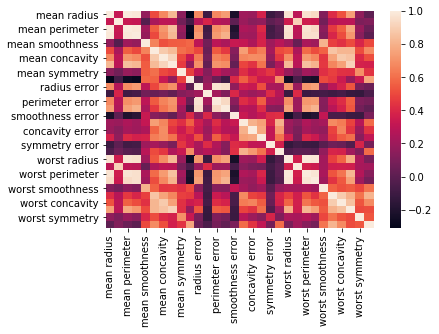

In [6]:
#Correlation in the X DataFrame
import seaborn as sns
sns.heatmap(X.corr())

In [7]:
#Feature description
X.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
mean radius,569.0,14.127292,3.524049,6.981000,11.700000,13.370000,15.780000,28.11000
mean texture,569.0,19.289649,4.301036,9.710000,16.170000,18.840000,21.800000,39.28000
mean perimeter,569.0,91.969033,24.298981,43.790000,75.170000,86.240000,104.100000,188.50000
mean area,569.0,654.889104,351.914129,143.500000,420.300000,551.100000,782.700000,2501.00000
mean smoothness,569.0,0.096360,0.014064,0.052630,0.086370,0.095870,0.105300,0.16340
mean compactness,569.0,0.104341,0.052813,0.019380,0.064920,0.092630,0.130400,0.34540
mean concavity,569.0,0.088799,0.079720,0.000000,0.029560,0.061540,0.130700,0.42680
mean concave points,569.0,0.048919,0.038803,0.000000,0.020310,0.033500,0.074000,0.20120
mean symmetry,569.0,0.181162,0.027414,0.106000,0.161900,0.179200,0.195700,0.30400
mean fractal dimension,569.0,0.062798,0.007060,0.049960,0.057700,0.061540,0.066120,0.09744


In [8]:
y = pd.Series(dataset.target, name = 'class')
y.head()

0    0
1    0
2    0
3    0
4    0
Name: class, dtype: int32

In [9]:
y.value_counts()   #1: benign, 0:malignant

1    357
0    212
Name: class, dtype: int64

In [10]:
#Split into training and test set for cross-validation
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=0,test_size=0.25)
X_test.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
512,13.40,20.52,88.64,556.7,0.11060,0.14690,0.14450,0.08172,0.2116,0.07325,...,16.41,29.66,113.30,844.4,0.15740,0.38560,0.51060,0.20510,0.3585,0.11090
457,13.21,25.25,84.10,537.9,0.08791,0.05205,0.02772,0.02068,0.1619,0.05584,...,14.35,34.23,91.29,632.9,0.12890,0.10630,0.13900,0.06005,0.2444,0.06788
439,14.02,15.66,89.59,606.5,0.07966,0.05581,0.02087,0.02652,0.1589,0.05586,...,14.91,19.31,96.53,688.9,0.10340,0.10170,0.06260,0.08216,0.2136,0.06710
298,14.26,18.17,91.22,633.1,0.06576,0.05220,0.02475,0.01374,0.1635,0.05586,...,16.22,25.26,105.80,819.7,0.09445,0.21670,0.15650,0.07530,0.2636,0.07676
37,13.03,18.42,82.61,523.8,0.08983,0.03766,0.02562,0.02923,0.1467,0.05863,...,13.30,22.81,84.46,545.9,0.09701,0.04619,0.04833,0.05013,0.1987,0.06169


In [11]:
y_test.head()

512    0
457    1
439    1
298    1
37     1
Name: class, dtype: int32

In [12]:
#import Logistic Regression 
#https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(max_iter=500, tol=0.001)
model.fit(X_train,y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=500,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.001, verbose=0,
                   warm_start=False)

The Warning shows that we need to scale the features as the solver (optimizer) is taking longer to find the minimum value. We will use Standard Scaler below: 

In [13]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_scaled = sc.fit_transform(X_train) #use only training set 
                                           #to make any adjustments to the model
                                           #during training

In [14]:
#Let's create a model again using the default settings
model = LogisticRegression()

In [15]:
model.fit(X_train_scaled, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [16]:
model.intercept_ #b0

array([0.02713751])

In [17]:
model.coef_ #coefficients of the features, b1, b2, ...

array([[-0.29792942, -0.58056355, -0.3109406 , -0.377129  , -0.11984232,
         0.42855478, -0.71131106, -0.85371164, -0.46688191,  0.11762548,
        -1.38262136,  0.0899184 , -0.94778563, -0.94686238,  0.18575731,
         0.99305313,  0.11090349, -0.3458275 ,  0.20290919,  0.80470317,
        -0.91626377, -0.91726667, -0.8159834 , -0.86539197, -0.45539191,
         0.10347391, -0.83009341, -0.98445173, -0.5920036 , -0.61086989]])

In [18]:
#To be able to test we need to scale the test data too (X part only) 
#using the same scaler that was used to scale the training data
X_test_scaled = sc.transform(X_test)

In [19]:
#Predict_proba gives the probabilities P(y=Ci|x)
model.predict_proba(X_test_scaled)

array([[9.98638613e-01, 1.36138656e-03],
       [3.95544804e-02, 9.60445520e-01],
       [1.30896362e-03, 9.98691036e-01],
       [1.24473354e-02, 9.87552665e-01],
       [2.44132101e-04, 9.99755868e-01],
       [4.50491513e-03, 9.95495085e-01],
       [1.13985968e-04, 9.99886014e-01],
       [1.82475894e-03, 9.98175241e-01],
       [9.67965506e-05, 9.99903203e-01],
       [1.75222878e-06, 9.99998248e-01],
       [1.76572612e-01, 8.23427388e-01],
       [8.24119135e-02, 9.17588087e-01],
       [9.66067493e-06, 9.99990339e-01],
       [5.39343196e-01, 4.60656804e-01],
       [3.98187854e-01, 6.01812146e-01],
       [9.95762760e-01, 4.23724017e-03],
       [2.75612083e-03, 9.97243879e-01],
       [9.99997097e-01, 2.90271401e-06],
       [9.99926506e-01, 7.34935682e-05],
       [9.99999997e-01, 2.78313939e-09],
       [9.98738365e-01, 1.26163489e-03],
       [9.81405399e-01, 1.85946008e-02],
       [1.77902039e-02, 9.82209796e-01],
       [9.65876713e-04, 9.99034123e-01],
       [9.994645

In [28]:
probabilities_test = model.predict_proba(X_test_scaled)[:,1]
probabilities_test[10:20] #second column belongs to class 1, ie, p = P(y=1|x)

array([8.23427388e-01, 9.17588087e-01, 9.99990339e-01, 4.60656804e-01,
       6.01812146e-01, 4.23724017e-03, 9.97243879e-01, 2.90271401e-06,
       7.34935682e-05, 2.78313939e-09])

In [29]:
#Whereas predict method gives the class prediction as either 0 or 1
y_predict = model.predict(X_test_scaled)
y_predict[10:20]

array([1, 1, 1, 0, 1, 0, 1, 0, 0, 0])

In [30]:
#Predictions based on a different threshold value
from sklearn.preprocessing import binarize
y_predict_thresh = binarize(probabilities_test.reshape(-1,1),threshold=0.75)
y_predict_thresh[10:20]

array([[1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.]])

In [22]:
#Performance measures for classification
#Accuracy = total no. of correct prediction/total no. of datapoints

model.score(X_test_scaled,y_test)

0.958041958041958

In [32]:
from sklearn.metrics import accuracy_score, confusion_matrix
accuracy_score(y_test,y_predict)

0.958041958041958

In [38]:
'''
        Predicted
        0   1
True  0 TN  FP
      1 FN  TP

'''
cm1 = confusion_matrix(y_test,y_predict)
cm1

array([[50,  3],
       [ 3, 87]], dtype=int64)

In [39]:
#Confusion matrix corresponding prob threshold = 0.75
cm2 = confusion_matrix(y_test,y_predict_thresh)
cm2

array([[52,  1],
       [ 6, 84]], dtype=int64)

In [25]:
#Fpr = fp/(tn+fp)
#tpr = tp/(fn+tp)

fpr1= 3/53
fpr2 = 1/53

tpr1 = 87/90
tpr2 = 84/90

0.965034965034965

In [26]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.94      0.94      0.94        53
           1       0.97      0.97      0.97        90

    accuracy                           0.96       143
   macro avg       0.96      0.96      0.96       143
weighted avg       0.96      0.96      0.96       143



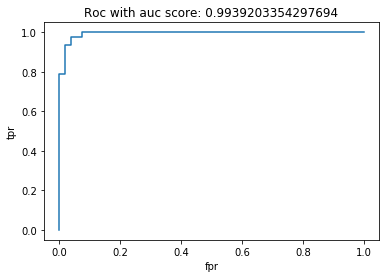

In [27]:
#ROC is the curve traced by the co-ordinates (FPR,TPR) 
#for different probability threshold values
#AUC is the area under the ROC curve

from sklearn.metrics import roc_auc_score, roc_curve
y_pred_prob = model.predict_proba(X_test_scaled)[:,1]

fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)


import  matplotlib.pyplot as plt
plt.plot(fpr,tpr)
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('Roc with auc score: {}'.format(roc_auc_score(y_test,y_pred_prob)))
plt.show()


AUC is an excellent performance measure for Logistic Regression Model as it is robust against probability threshold values and truly depicts if the model is good or not for the data at hand. The closer the score to 1, the better. If the score is near 0.5, it means that Logistic Regression is not a good fit for the data. Either we need to get more discriminative features to help identify the target class or look for other model options (may be a complex non-linear model)